In [1]:
import matplotlib.pyplot as plot
import numpy as np
import odespy

%matplotlib inline

In [2]:
from pyclouds import cloud_microphysics, parameterisations
from pyclouds.common import Var, ATHAM_constants
from pyclouds.plotting import plot_hydrometeor_evolution

/home/zmaw/m300464/pytools/pyclouds/parameterisations.py:169: UserWarning: Using default value for b_K
  warnings.warn("Using default value for %s" % c_name)
/home/zmaw/m300464/pytools/pyclouds/parameterisations.py:169: UserWarning: Using default value for a_K
  warnings.warn("Using default value for %s" % c_name)
/home/zmaw/m300464/pytools/pyclouds/cloud_microphysics.py:221: UserWarning: EoS calculation stored within microphysics, should really use something defined externally
  warnings.warn("EoS calculation stored within microphysics, should really use something defined externally")
/home/zmaw/m300464/pytools/pyclouds/cloud_microphysics.py:320: RuntimeWarning: divide by zero encountered in double_scalars
  lambda_r = (pi*(qg*rho_l)/(qr*rho_g)*N0r)**(1./4.)
/usr/lib/pymodules/python2.7/matplotlib/axes.py:2667: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=5.0, top=5.0
  + 'bottom=%s, top=%s') % (bottom, top))

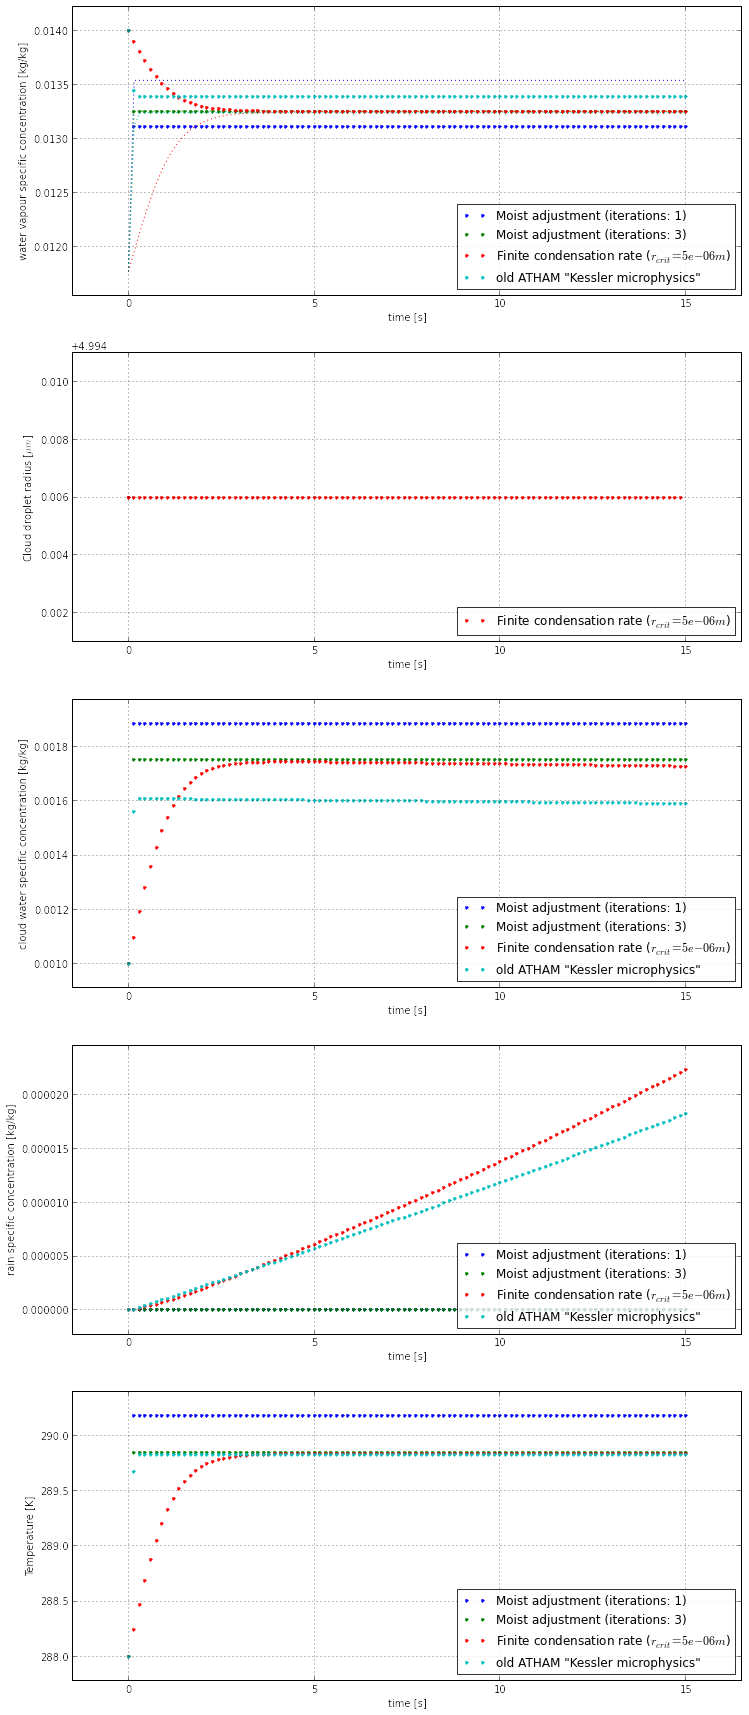

In [3]:
initial_condition = np.zeros((Var.NUM))
initial_condition[Var.q_v] = 1.4e-2
initial_condition[Var.q_l] = 0.1e-2

initial_condition[Var.T] = 288.
p0 = 88676.  # [Pa]

t_ = np.linspace(0., 15., 100)

SolverClass = odespy.Euler
constants = ATHAM_constants

microphysics_model = cloud_microphysics.MoistAdjustmentMicrophysics(constants=constants)
solutions = []
solutions.append(microphysics_model.integrate(initial_condition=initial_condition, t=t_, p0=p0))
solutions.append(microphysics_model.integrate(initial_condition=initial_condition, t=t_, p0=p0, iterations=3))
#solutions.append(cloud_microphysics.FiniteCondensationTimeMicrophysics().integrate(initial_condition=initial_condition, t=t_, p0=p0, SolverClass=SolverClass))
solutions.append(cloud_microphysics.FiniteCondensationTimeMicrophysics(constants=constants).integrate(initial_condition=initial_condition, t=t_, p0=p0, SolverClass=SolverClass))
#solutions.append(cloud_microphysics.FiniteCondensationTimeMicrophysics(r_crit=np.inf).integrate(initial_condition=initial_condition, t=t_, p0=p0, SolverClass=SolverClass))
#solutions.append(cloud_microphysics.FortranNoIceMicrophysics().integrate(initial_condition=initial_condition, t=t_, p0=p0))
solutions.append(cloud_microphysics.OldATHAMKesslerFortran().integrate(initial_condition=initial_condition, t=t_, p0=p0))



#sol2.plot()
plot = plot_hydrometeor_evolution(solutions, variables=['q_v', 'r_c', 'q_l', 'q_r', 'T',])